#DECISION TREE

In [2]:
import pandas as pd
import numpy as np
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', 
                        names = ['party', 'handicapped-infants', 'water-project-cost-sharing', 'adoption-of-the-budget-resolution', 
                                 'physician-fee-freeze', 'el-salvador-aid', 'religious-groups-in-schools', 'anti-satellite-test-ban', 
                                 'aid-to-nicaraguan-contras', 'mx-missile', 'immigration','synfuels-corporation-cutback', 'education-spending',
                                 'superfund-right-to-sue','crime','duty-free-exports','export-administration-act-south-africa'])

In [ ]:
df.head(3)

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n


In [ ]:
df.tail()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
430,republican,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y
431,democrat,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y
432,republican,n,?,n,y,y,y,n,n,n,n,y,y,y,y,n,y
433,republican,n,n,n,y,y,y,?,?,?,?,n,y,y,y,n,y
434,republican,n,y,n,y,y,y,n,n,n,y,n,y,y,y,?,n


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   party                                   435 non-null    object
 1   handicapped-infants                     435 non-null    object
 2   water-project-cost-sharing              435 non-null    object
 3   adoption-of-the-budget-resolution       435 non-null    object
 4   physician-fee-freeze                    435 non-null    object
 5   el-salvador-aid                         435 non-null    object
 6   religious-groups-in-schools             435 non-null    object
 7   anti-satellite-test-ban                 435 non-null    object
 8   aid-to-nicaraguan-contras               435 non-null    object
 9   mx-missile                              435 non-null    object
 10  immigration                             435 non-null    object
 11  synfue

In [ ]:
df.describe()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
count,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435
unique,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
top,democrat,n,y,y,n,y,y,y,y,y,y,n,n,y,y,n,y
freq,267,236,195,253,247,212,272,239,242,207,216,264,233,209,248,233,269


In [ ]:
#untuk melihat kolom 
print(df.keys())

Index(['party', 'handicapped-infants', 'water-project-cost-sharing',
       'adoption-of-the-budget-resolution', 'physician-fee-freeze',
       'el-salvador-aid', 'religious-groups-in-schools',
       'anti-satellite-test-ban', 'aid-to-nicaraguan-contras', 'mx-missile',
       'immigration', 'synfuels-corporation-cutback', 'education-spending',
       'superfund-right-to-sue', 'crime', 'duty-free-exports',
       'export-administration-act-south-africa'],
      dtype='object')


**Preprocessing (make data ready for modelling)**

https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd

cara 1

In [3]:
# a list with all missing value formats
missing_value_formats = ["n.a.","?","NA","n/a", "na", "--"]
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', 
                        names = ['party', 'handicapped-infants', 'water-project-cost-sharing', 
                                 'adoption-of-the-budget-resolution', 'physician-fee-freeze', 
                                 'el-salvador-aid', 'religious-groups-in-schools', 
                                 'anti-satellite-test-ban', 'aid-to-nicaraguan-contras', 
                                 'mx-missile', 'immigration','synfuels-corporation-cutback', 
                                 'education-spending', 'superfund-right-to-sue','crime','duty-free-exports',
                                 'export-administration-act-south-africa'], na_values = missing_value_formats)

In [ ]:
df.head()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [4]:
voting_data = df.copy()

Cara ke 2

In [5]:
ynmap = {'y':1,'n':0,'?':np.nan}
partymap = {'republican':0,'democrat':1}
voting_data['party_USA'] = voting_data['party'].map(partymap)
voting_data.drop('party',axis=1,inplace=True)
for column in voting_data.columns.drop('party_USA'):
    voting_data[column+'1'] = voting_data[column].map(ynmap)
    voting_data.drop(column,axis=1,inplace=True)
# data_col = voting_data.columns
voting_data.head()

,party_USA,handicapped-infants1,water-project-cost-sharing1,adoption-of-the-budget-resolution1,physician-fee-freeze1,el-salvador-aid1,religious-groups-in-schools1,anti-satellite-test-ban1,aid-to-nicaraguan-contras1,mx-missile1,immigration1,synfuels-corporation-cutback1,education-spending1,superfund-right-to-sue1,crime1,duty-free-exports1,export-administration-act-south-africa1
0,0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,1,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,1,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


Cara 3

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# encoder = LabelEncoder()
# data = df["party"]
# df.drop('party',axis=1,inplace=True)
# encoder_result = encoder.fit_transform(data)

# #tambahakan data ke kolom baru letakan di index 0
# df.insert (0, "party", encoder_result)

In [ ]:
# print(encoder.classes_)
# print(encoder.transform(encoder.classes_))

['democrat' 'republican']
[0 1]


In [ ]:
# df.head(2)

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,1,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,1,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN


In [ ]:
voting_data.isnull().sum()

party_USA                                    0
handicapped-infants1                        12
water-project-cost-sharing1                 48
adoption-of-the-budget-resolution1          11
physician-fee-freeze1                       11
el-salvador-aid1                            15
religious-groups-in-schools1                11
anti-satellite-test-ban1                    14
aid-to-nicaraguan-contras1                  15
mx-missile1                                 22
immigration1                                 7
synfuels-corporation-cutback1               21
education-spending1                         31
superfund-right-to-sue1                     25
crime1                                      17
duty-free-exports1                          28
export-administration-act-south-africa1    104
dtype: int64

**Hnadling missing value**

https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4

https://medium.com/@kyawsawhtoon/a-guide-to-knn-imputation-95e2dc496e

https://towardsdatascience.com/how-to-deal-with-missing-data-in-python-1f74a9112d93

In [ ]:
# #imputation for missing values
# from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors=6)
# data = pd.DataFrame(imputer.fit_transform(df),columns=data_col)

Handle Missing Values of Categorical Variables:

https://www.analyticsvidhya.com/blog/2021/04/how-to-handle-missing-values-of-categorical-variables/

In [6]:
# filling missing values 
voting_data.fillna(voting_data.mode().iloc[0], inplace=True)

In [8]:
voting_data.head()

,party_USA,handicapped-infants1,water-project-cost-sharing1,adoption-of-the-budget-resolution1,physician-fee-freeze1,el-salvador-aid1,religious-groups-in-schools1,anti-satellite-test-ban1,aid-to-nicaraguan-contras1,mx-missile1,immigration1,synfuels-corporation-cutback1,education-spending1,superfund-right-to-sue1,crime1,duty-free-exports1,export-administration-act-south-africa1
0,0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
1,0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
2,1,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,1,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0


In [ ]:
voting_data.isnull().sum()

party_USA                                  0
handicapped-infants1                       0
water-project-cost-sharing1                0
adoption-of-the-budget-resolution1         0
physician-fee-freeze1                      0
el-salvador-aid1                           0
religious-groups-in-schools1               0
anti-satellite-test-ban1                   0
aid-to-nicaraguan-contras1                 0
mx-missile1                                0
immigration1                               0
synfuels-corporation-cutback1              0
education-spending1                        0
superfund-right-to-sue1                    0
crime1                                     0
duty-free-exports1                         0
export-administration-act-south-africa1    0
dtype: int64

**Declare feature vector and target variable**

In [9]:
X = voting_data.drop(['party_USA'], axis=1)

y = voting_data['party_USA']

Split data into separate training and test set

In [10]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
X_train.shape, X_test.shape

((304, 16), (131, 16))

Decision Tree tidak masalah tanpa split

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [ ]:
df.columns[1:]

Index(['handicapped-infants1', 'water-project-cost-sharing1',
       'adoption-of-the-budget-resolution1', 'physician-fee-freeze1',
       'el-salvador-aid1', 'religious-groups-in-schools1',
       'anti-satellite-test-ban1', 'aid-to-nicaraguan-contras1', 'mx-missile1',
       'immigration1', 'synfuels-corporation-cutback1', 'education-spending1',
       'superfund-right-to-sue1', 'crime1', 'duty-free-exports1',
       'export-administration-act-south-africa1'],
      dtype='object')

In [ ]:
y_train

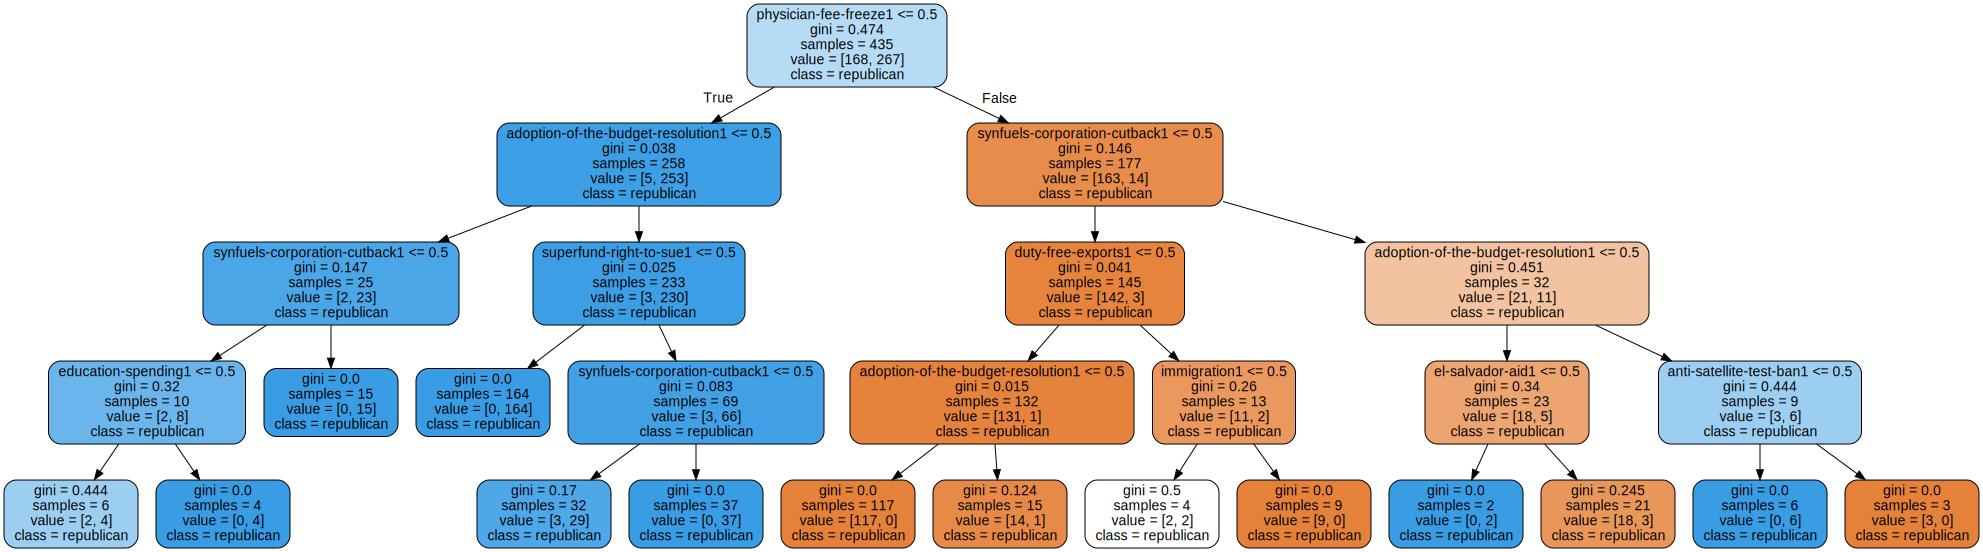

In [ ]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
        feature_names=X_train.columns, # kolom dari fitur  
        class_names=df.party,  # dari target
        filled=True,
        rounded=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

**Prediksi dan Accuracy**

In [ ]:

tree_clf.predict_proba([[0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0]])

array([[1., 0.]])

dari data diatas berarti 100% untuk party republic dan 0% untuk party democrat

In [ ]:
new_prediction= tree_clf.predict([[0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0]])
if new_prediction == [1.]:
  print("Prediction: {democrat}")
else:
  print("Prediction: {republic}")

Prediction: {republic}


In [ ]:
new_prediction2= tree_clf.predict([[0.0,	1.0,	1.0,	0.0,	1.0,	1.0,	0.0,	0.0,	0.0,	0.0,	1.0,	0.0,	1.0,	1.0,	0.0,	0.0]])
if new_prediction2 == [1.]:
  print("Prediction: {democrat}")
else:
  print("Prediction: {republic}")

Prediction: {democrat}


Compare the train-set and test-set accuracy

TEST

In [ ]:
# Predict
y_pred = tree_clf.predict(X_test)
# y_pred

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.9847


TRAIN

In [ ]:
y_pred_train = tree_clf.predict(X_train)

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9704


TRAIN & TEST SCORE

In [ ]:
print('Training set score: {:.4f}'.format(tree_clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(tree_clf.score(X_test, y_test)))

Training set score: 0.9704
Test set score: 0.9847


TEST

In [ ]:
# MSE, MAE, R2, RMSE Method One
from sklearn.metrics import mean_squared_error #MSE
from sklearn.metrics import mean_absolute_error #MAE
from sklearn.metrics import r2_score#R 2
 #transfer 
print('MSE:', mean_squared_error(y_test,y_pred))
print('MAE:', mean_absolute_error(y_test,y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test,y_pred)))  # RMSE
print('r2:', r2_score(y_test,y_pred))

MSE: 0.015267175572519083
MAE: 0.015267175572519083
RMSE: 0.1235604126430431
r2: 0.9329923273657289


TRAIN

In [ ]:
# MSE, MAE, R2, RMSE Method One
from sklearn.metrics import mean_squared_error #MSE
from sklearn.metrics import mean_absolute_error #MAE
from sklearn.metrics import r2_score#R 2
 #transfer 
print('MSE:', mean_squared_error(y_train,y_pred_train))
print('MAE:', mean_absolute_error(y_train,y_pred_train))
print('RMSE:', np.sqrt(mean_squared_error(y_train,y_pred_train)))  # RMSE
print('r2:', r2_score(y_test,y_pred))

MSE: 0.029605263157894735
MAE: 0.029605263157894735
RMSE: 0.17206180040292132
r2: 0.9329923273657289


Classification Report

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        46
           1       0.99      0.99      0.99        85

    accuracy                           0.98       131
   macro avg       0.98      0.98      0.98       131
weighted avg       0.98      0.98      0.98       131



Referensi:

https://www.kaggle.com/prashant111/decision-tree-classifier-tutorial

https://www.kaggle.com/faressayah/decision-trees-and-random-forest-for-beginners

**Decision Tree Classifier Hyperparameter tuning**

In [ ]:
#fungsi print_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}


tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 956 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 5756 tasks      | elapsed:   16.5s


Best paramters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2, 'splitter': 'best'})
Train Result:
Accuracy Score: 95.39%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.965517    0.946809  0.953947    0.956163      0.954317
recall       0.918033    0.978022  0.953947    0.948027      0.953947
f1-score     0.941176    0.962162  0.953947    0.951669      0.953740
support    122.000000  182.000000  0.953947  304.000000    304.000000
_______________________________________________
Confusion Matrix: 
 [[112  10]
 [  4 178]]

Test Result:
Accuracy Score: 94.66%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precision   0.953488   0.943182  0.946565    0.948335      0.946801
recall      0.891304   0.976471  0.946565    0.933887      0.946565
f1-score    0.921

[Parallel(n_jobs=-1)]: Done 12996 out of 12996 | elapsed:   37.1s finished


https://towardsdatascience.com/how-to-find-decision-tree-depth-via-cross-validation-2bf143f0f3d6 

#RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 99.34%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.991803    0.994505  0.993421    0.993154      0.993421
recall       0.991803    0.994505  0.993421    0.993154      0.993421
f1-score     0.991803    0.994505  0.993421    0.993154      0.993421
support    122.000000  182.000000  0.993421  304.000000    304.000000
_______________________________________________
Confusion Matrix: 
 [[121   1]
 [  1 181]]

Test Result:
Accuracy Score: 96.18%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precision   0.955556   0.965116  0.961832    0.960336      0.961759
recall      0.934783   0.976471  0.961832    0.955627      0.961832
f1-score    0.945055   0.970760  0.961832    0.957908      0.961734
support    46.000000  85.000000  0.961832  131.000000    131.000000
___

**Random Forest hyperparameter tuning**

1. Randomized Search Cross Validation

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = RandomizedSearchCV(estimator=rf_clf, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)

rf_cv.fit(X_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

rf_clf = RandomForestClassifier(**rf_best_params)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   46.8s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.1min finished


Best paramters: {'n_estimators': 1800, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': False})
Train Result:
Accuracy Score: 97.04%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.966942    0.972678  0.970395    0.969810      0.970376
recall       0.959016    0.978022  0.970395    0.968519      0.970395
f1-score     0.962963    0.975342  0.970395    0.969153      0.970374
support    122.000000  182.000000  0.970395  304.000000    304.000000
_______________________________________________
Confusion Matrix: 
 [[117   5]
 [  4 178]]

Test Result:
Accuracy Score: 95.42%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precision   0.934783   0.964706  0.954198    0.949744      0.954198
recall      0.934783   0.964706  0.954198    0.949744      

2. Grid Search Cross Validation (Kalau lama running di stop saja, gunakan cara yang pertama)



In [ ]:
n_estimators = [100, 500, 1000, 1500]
max_features = ['auto', 'sqrt']
max_depth = [2, 3, 5]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4, 10]
bootstrap = [True, False]

params_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = GridSearchCV(rf_clf, params_grid, scoring="f1", cv=3, verbose=2, n_jobs=-1)


rf_cv.fit(X_train, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

penerapan RF

https://www.kaggle.com/faressayah/ensemble-ml-algorithms-bagging-boosting-voting

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42, n_estimators=1000)
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[122   0]
 [  2 180]]
ACCURACY SCORE:
0.9934
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.983871    1.000000  0.993421    0.991935      0.993527
recall       1.000000    0.989011  0.993421    0.994505      0.993421
f1-score     0.991870    0.994475  0.993421    0.993173      0.993430
support    122.000000  182.000000  0.993421  304.000000    304.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[45  1]
 [ 2 83]]
ACCURACY SCORE:
0.9771
CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precision   0.957447   0.988095  0.977099    0.972771      0.977333
recall      0.978261   0.976471  0.977099    0.977366      0.977099
f1-score    0.967742   0.982249  0.977099    0.974995      0.977155
support    46.000000  85.000000  0.977099  131.000000    131.000000


In [ ]:
scores = {
    'Random Forest': {
        'Train': accuracy_score(y_train, rf_clf.predict(X_train)),
        'Test': accuracy_score(y_test, rf_clf.predict(X_test)),
    },
}

In [ ]:
scores['Random Forest'] = {
        'Train': accuracy_score(y_train, rf_clf.predict(X_train)),
        'Test': accuracy_score(y_test, rf_clf.predict(X_test)),
}

**Voting**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#soft voting
log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
svm_clf = SVC(gamma="scale", probability=True, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                               

In [ ]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                               

In [ ]:
evaluate(voting_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[117   5]
 [  4 178]]
ACCURACY SCORE:
0.9704
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.966942    0.972678  0.970395    0.969810      0.970376
recall       0.959016    0.978022  0.970395    0.968519      0.970395
f1-score     0.962963    0.975342  0.970395    0.969153      0.970374
support    122.000000  182.000000  0.970395  304.000000    304.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[44  2]
 [ 3 82]]
ACCURACY SCORE:
0.9618
CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precision   0.936170   0.976190  0.961832    0.956180      0.962138
recall      0.956522   0.964706  0.961832    0.960614      0.961832
f1-score    0.946237   0.970414  0.961832    0.958325      0.961924
support    46.000000  85.000000  0.961832  131.000000    131.000000


In [ ]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.9618320610687023
RandomForestClassifier 0.9770992366412213
SVC 0.9618320610687023
VotingClassifier 0.9618320610687023


In [ ]:
scores['Voting'] = {
        'Train': accuracy_score(y_train, voting_clf.predict(X_train)),
        'Test': accuracy_score(y_test, voting_clf.predict(X_test))
    }

In [ ]:
# from sklearn.ensemble import VotingClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC

# estimators = []
# log_reg = LogisticRegression(solver='liblinear')
# estimators.append(('Logistic', log_reg))

# tree = DecisionTreeClassifier()
# estimators.append(('Tree', tree))

# svm_clf = SVC(gamma='scale')
# estimators.append(('SVM', svm_clf))

# voting = VotingClassifier(estimators=estimators)
# voting.fit(X_train, y_train)

# evaluate(voting, X_train, X_test, y_train, y_test)

**BAGGING**

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_estimator=tree, n_estimators=1000, random_state=42)
bagging_clf.fit(X_train, y_train)

evaluate(bagging_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[122   0]
 [  2 180]]
ACCURACY SCORE:
0.9934
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.983871    1.000000  0.993421    0.991935      0.993527
recall       1.000000    0.989011  0.993421    0.994505      0.993421
f1-score     0.991870    0.994475  0.993421    0.993173      0.993430
support    122.000000  182.000000  0.993421  304.000000    304.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[42  4]
 [ 1 84]]
ACCURACY SCORE:
0.9618
CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precision   0.976744   0.954545  0.961832    0.965645      0.962340
recall      0.913043   0.988235  0.961832    0.950639      0.961832
f1-score    0.943820   0.971098  0.961832    0.957459      0.961520
support    46.000000  85.000000  0.961832  131.000000    131.000000


In [ ]:
y_pred_bagging = bagging_clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred_bagging))

0.9618320610687023


In [ ]:
scores['Bagging Classifier']= {
        'Train': accuracy_score(y_train, bagging_clf.predict(X_train)),
        'Test': accuracy_score(y_test, bagging_clf.predict(X_test)),
}

**ADABOOTS**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)
evaluate(ada_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[118   4]
 [  6 176]]
ACCURACY SCORE:
0.9671
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.951613    0.977778  0.967105    0.964695      0.967277
recall       0.967213    0.967033  0.967105    0.967123      0.967105
f1-score     0.959350    0.972376  0.967105    0.965863      0.967148
support    122.000000  182.000000  0.967105  304.000000    304.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[44  2]
 [ 3 82]]
ACCURACY SCORE:
0.9618
CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precision   0.936170   0.976190  0.961832    0.956180      0.962138
recall      0.956522   0.964706  0.961832    0.960614      0.961832
f1-score    0.946237   0.970414  0.961832    0.958325      0.961924
support    46.000000  85.000000  0.961832  131.000000    131.000000


In [ ]:
scores['AdaBoost'] = {
        'Train': accuracy_score(y_train, ada_clf.predict(X_train)),
        'Test': accuracy_score(y_test, ada_clf.predict(X_test)),
    }

**GRADIENT BOOSTING**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost_clf = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, random_state=42)
grad_boost_clf.fit(X_train, y_train)
evaluate(grad_boost_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[122   0]
 [  2 180]]
ACCURACY SCORE:
0.9934
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.983871    1.000000  0.993421    0.991935      0.993527
recall       1.000000    0.989011  0.993421    0.994505      0.993421
f1-score     0.991870    0.994475  0.993421    0.993173      0.993430
support    122.000000  182.000000  0.993421  304.000000    304.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[41  5]
 [ 1 84]]
ACCURACY SCORE:
0.9542
CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precision   0.976190   0.943820  0.954198    0.960005      0.955187
recall      0.891304   0.988235  0.954198    0.939770      0.954198
f1-score    0.931818   0.965517  0.954198    0.948668      0.953684
support    46.000000  85.000000  0.954198  131.000000    131.000000


In [ ]:
scores['Gradient Boosting'] = {
        'Train': accuracy_score(y_train, grad_boost_clf.predict(X_train)),
        'Test': accuracy_score(y_test, grad_boost_clf.predict(X_test)),
    }

**Early Stoping**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=49)

gbrt = GradientBoostingClassifier(max_depth=2, n_estimators=200, random_state=42)
gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_val, y_pred)
          for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors) + 1

gbrt_best = GradientBoostingClassifier(max_depth=2, n_estimators=bst_n_estimators, random_state=42)
gbrt_best.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=71,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
evaluate(gbrt_best, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[128   2]
 [  5 191]]
ACCURACY SCORE:
0.9785
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.962406    0.989637  0.978528    0.976022      0.978778
recall       0.984615    0.974490  0.978528    0.979553      0.978528
f1-score     0.973384    0.982005  0.978528    0.977695      0.978567
support    130.000000  196.000000  0.978528  326.000000    326.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[45  1]
 [ 1 84]]
ACCURACY SCORE:
0.9847
CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precision   0.978261   0.988235  0.984733    0.983248      0.984733
recall      0.978261   0.988235  0.984733    0.983248      0.984733
f1-score    0.978261   0.988235  0.984733    0.983248      0.984733
support    46.000000  85.000000  0.984733  131.000000    131.000000


**XGBoost**

In [ ]:
try:
    import xgboost
except ImportError as ex:
    print("Error: the xgboost library is not installed.")
    xgboost = None

In [ ]:
if xgboost is not None:  # not shown in the book
    xgb_reg = xgboost.XGBRegressor(random_state=42)
    xgb_reg.fit(X_train, y_train)
    y_pred = xgb_reg.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred) # Not shown
    print("Validation MSE:", val_error)           # Not shown

[14:16:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation MSE: 0.04794826590625501


In [ ]:
if xgboost is not None:  # not shown in the book
    xgb_reg.fit(X_train, y_train,
                eval_set=[(X_val, y_val)], early_stopping_rounds=2)
    y_pred = xgb_reg.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)  # Not shown
    print("Validation MSE:", val_error)            # Not shown

In [ ]:
%timeit xgboost.XGBRegressor().fit(X_train, y_train) if xgboost is not None else None

In [ ]:
%timeit GradientBoostingClassifier().fit(X_train, y_train)

10 loops, best of 5: 76.2 ms per loop


XGBOOST

https://www.kaggle.com/pragyanbo/ensemble-learning-methods-using-titanic-dataset#XGBoost-(Extreme-Gradient-Boosting)

In [ ]:
import xgboost as xgb

In [ ]:
xgb_clf = xgb.XGBClassifier(max_depth=5, n_estimators=1000, learning_rate=0.3, n_jobs=-1)

In [ ]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:
Accuracy Score: 99.08%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.992248    0.989848  0.990798    0.991048      0.990805
recall       0.984615    0.994898  0.990798    0.989757      0.990798
f1-score     0.988417    0.992366  0.990798    0.990392      0.990791
support    130.000000  196.000000  0.990798  326.000000    326.000000
_______________________________________________
Confusion Matrix: 
 [[128   2]
 [  1 195]]



In [ ]:
evaluate(xgb_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[128   2]
 [  1 195]]
ACCURACY SCORE:
0.9908
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.992248    0.989848  0.990798    0.991048      0.990805
recall       0.984615    0.994898  0.990798    0.989757      0.990798
f1-score     0.988417    0.992366  0.990798    0.990392      0.990791
support    130.000000  196.000000  0.990798  326.000000    326.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[44  2]
 [ 1 84]]
ACCURACY SCORE:
0.9771
CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precision   0.977778   0.976744  0.977099    0.977261      0.977107
recall      0.956522   0.988235  0.977099    0.972379      0.977099
f1-score    0.967033   0.982456  0.977099    0.974745      0.977040
support    46.000000  85.000000  0.977099  131.000000    131.000000


In [ ]:
scores['XGBoost'] = {
        'Train': accuracy_score(y_train, xgb_clf.predict(X_train)),
        'Test': accuracy_score(y_test, xgb_clf.predict(X_test)),
    }

**VISUALISASI PERBANDINGAN**

In [ ]:
import matplotlib.pyplot as plt
# import seaborn as sns

# %matplotlib inline
# sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

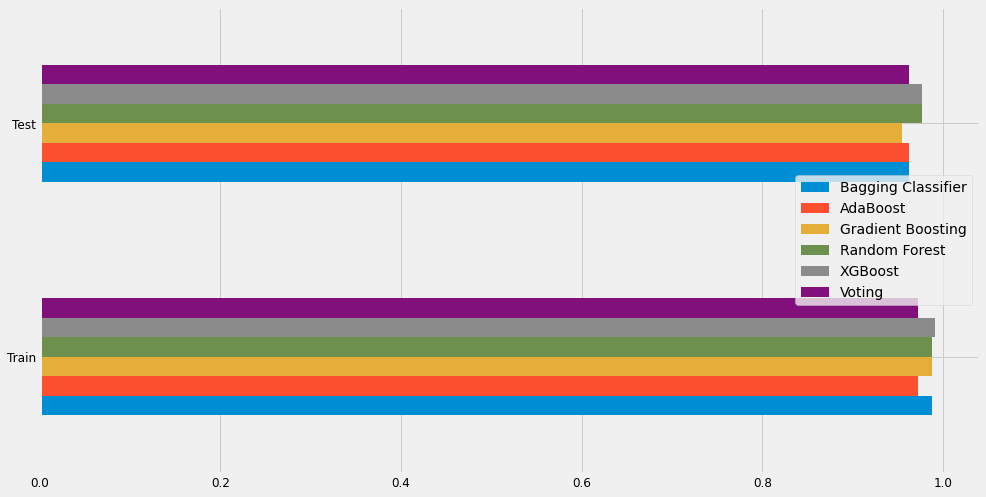

In [ ]:
scores_df = pd.DataFrame(scores)

scores_df.plot(kind='barh', figsize=(15, 8))

# K-NN

https://www.kaggle.com/prashant111/knn-classifier-tutorial

https://www.saedsayad.com/k_nearest_neighbors.htm#:~:text=K%20nearest%20neighbors%20is%20a,as%20a%20non%2Dparametric%20technique.

In [20]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics
import matplotlib.pyplot as plt


find the value of K

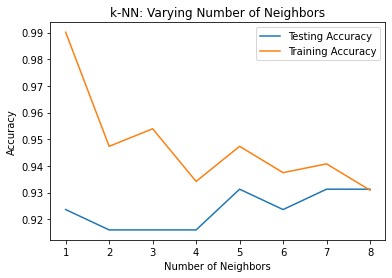

In [15]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# error1= []
# error2= []
# for k in range(1,15):
#     knn= KNeighborsClassifier(n_neighbors=k)
#     knn.fit(X_train,y_train)
#     y_pred1= knn.predict(X_train)
#     error1.append(np.mean(y_train!= y_pred1))
#     y_pred2= knn.predict(X_test)
#     error2.append(np.mean(y_test!= y_pred2))
# # plt.figure(figsize(10,5))
# plt.plot(range(1,15),error1,label="train")
# plt.plot(range(1,15),error2,label="test")
# plt.xlabel('k Value')
# plt.ylabel('Error')
# plt.legend()

In [17]:
X_new=np.array([[0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0]])

In [18]:
# Create a k-NN classifier with 8 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=8)

# Fit the classifier to the data
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
# Predict and print the label for the new data point X_new
new_prediction = knn.predict(X_new)
print("Prediction: {}".format(new_prediction))

Prediction: [0]


In [21]:
metrics.accuracy_score(y_test,y_pred)

0.9312977099236641

In [22]:
print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

Training set score: 0.9309
Test set score: 0.9313


In [25]:
# from sklearn.metrics import classification_report
# print(classification_report(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91        46
           1       0.96      0.93      0.95        85

    accuracy                           0.93       131
   macro avg       0.92      0.93      0.93       131
weighted avg       0.93      0.93      0.93       131

